# Intuit Quickbooks Upgrade

* Team-lead GitLab userid: 236
* Group name: Just4noobs
* Team member names: Kaicheng Yang, Songqiao Li, Yanqiao Li, Tiancheng Kuang

## Setup

Please complete this python notebook with your group by answering the questions in `intuit.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the first group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import seaborn as sns

#increase plot resolution
mpl.rcParams["figure.dpi"] = 100

In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = rsm.ifelse(intuit75k.res1 == "Yes", 1, 0)
intuit75k.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [3]:
# show dataset description
rsm.describe(intuit75k)

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample


In [4]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

      index     OR     OR%   2.5%  97.5% p.values     
1   numords  1.352   35.2%  1.313  1.392   < .001  ***
2  version1  2.113  111.3%  1.911  2.335   < .001  ***
3  upgraded  2.628  162.8%  2.388  2.894   < .001  ***


In [5]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [6]:
# Add columns `rec_iq`, `freq_iq`, and `mon_iq` to the `tuango` DataFrame
intuit75k = intuit75k.assign(rec_iq=rsm.xtile(intuit75k["last"], 5),
                       freq_iq=rsm.xtile(intuit75k["numords"], 4, rev=True),
                       mon_iq=rsm.xtile(intuit75k["dollars"], 5, rev=True))

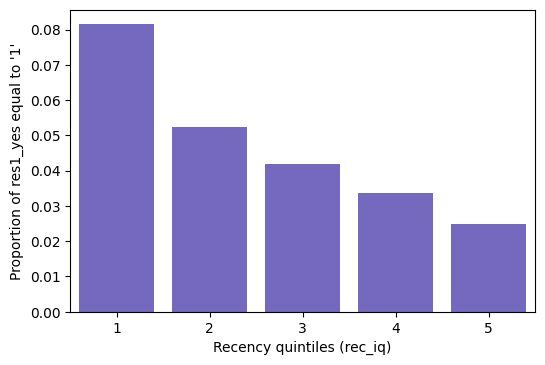

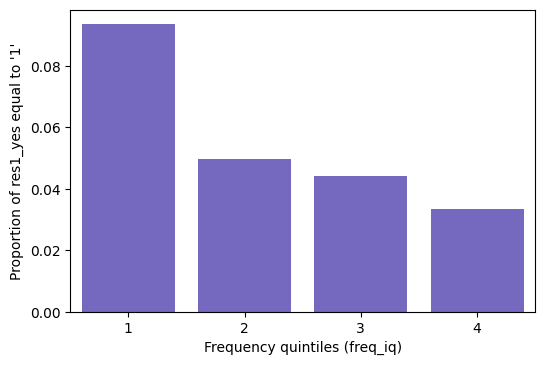

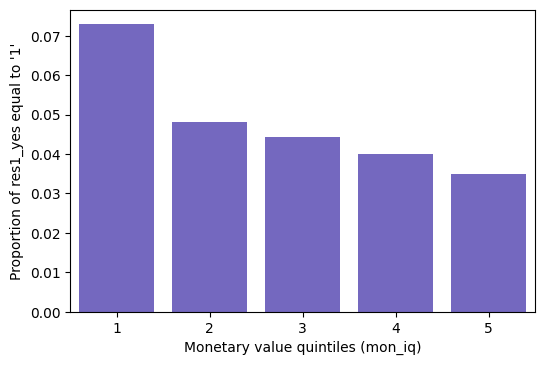

In [7]:
fig = rsm.prop_plot(intuit75k, "rec_iq", "res1_yes", 1)
fig = fig.set_xlabel("Recency quintiles (rec_iq)")
plt.show()

fig = rsm.prop_plot(intuit75k, "freq_iq", "res1_yes", 1)
fig = fig.set_xlabel("Frequency quintiles (freq_iq)")
plt.show()

fig = rsm.prop_plot(intuit75k, "mon_iq", "res1_yes", 1)
fig = fig.set_xlabel("Monetary value quintiles (mon_iq)")
plt.show()

In [8]:
#Make assumptions
cost = 1.41
margin = 60
breakeven =  cost/margin

In [9]:
# add `rfm_iq` to the intuit dataset
intuit75k["rfm_iq"] = intuit75k.rec_iq.astype(str) + intuit75k.freq_iq.astype(str) + intuit75k.mon_iq.astype(str)

In [10]:
def response_rate(x, lev="Yes"):
    return np.nanmean(x == lev)

def wave2(x, lev="yes", breakeven=0):
    return np.nanmean(x == "Yes") > breakeven

In [11]:
train = intuit75k[intuit75k["training"] == 1]

train = train.assign(
    wave2to_iq = train.groupby("rfm_iq").res1.transform(wave2, breakeven=breakeven)
)

intuit75k["wave2to_iq"] = intuit75k["rfm_iq"].isin(train[train["wave2to_iq"] == True].groupby("rfm_iq").describe().reset_index()["rfm_iq"])

In [12]:
intuit75k["freq_sq"] = intuit75k.groupby("rec_iq").numords.transform(rsm.xtile, 3, rev=True)
intuit75k["mon_sq"] = intuit75k.groupby(["rec_iq", "freq_sq"]).dollars.transform(rsm.xtile, 5, rev=True)

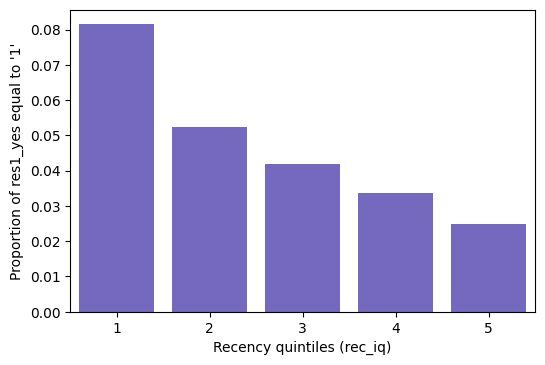

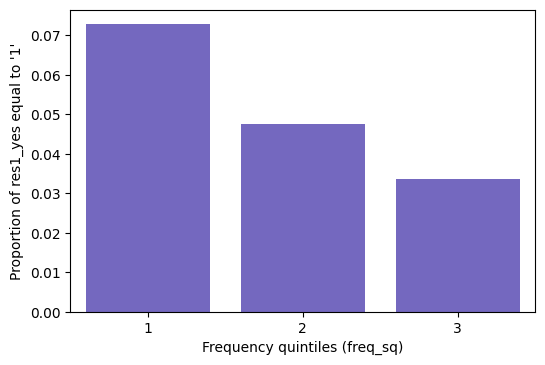

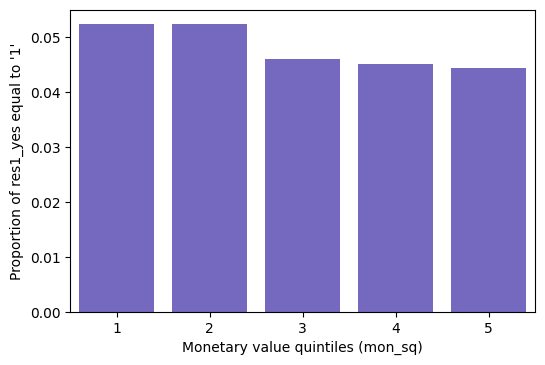

In [13]:
fig = rsm.prop_plot(intuit75k, "rec_iq", "res1_yes", 1)
fig = fig.set_xlabel("Recency quintiles (rec_iq)")
plt.show()

fig = rsm.prop_plot(intuit75k, "freq_sq", "res1_yes", 1)
fig = fig.set_xlabel("Frequency quintiles (freq_sq)")
plt.show()

fig = rsm.prop_plot(intuit75k, "mon_sq", "res1_yes", 1)
fig = fig.set_xlabel("Monetary value quintiles (mon_sq)")
plt.show()

In [14]:
intuit75k["rfm_sq"] = intuit75k.rec_iq.astype(str) + intuit75k.freq_sq.astype(str) + intuit75k.mon_sq.astype(str)

In [15]:
train = intuit75k[intuit75k["training"] == 1]
train = train.assign(
    wave2to_sq = train.groupby("rfm_sq").res1.transform(wave2, breakeven=breakeven)
)
intuit75k["wave2to_sq"] = intuit75k["rfm_sq"].isin(list(train[train["wave2to_sq"] == True].groupby("rfm_sq").describe().reset_index()["rfm_sq"]))

In [16]:
def perf_calc_actual(dat = intuit75k, wave2to = None, perf = "res1_yes", lev = 1):

    sub_dat1 = dat[dat["training"] == 1]
    sub_dat0 = dat[dat["training"] == 0]
    
    nr_sms = len(sub_dat0[(sub_dat0[wave2to] == True)])
    sms_cost = nr_sms * cost
    nr_responses = len(sub_dat0[(sub_dat0[wave2to] == True) & (sub_dat0[perf] == lev)])
    revenue = nr_responses * margin
    profit = revenue - sms_cost
    ROME = profit / sms_cost
   
    return ROME, profit #nr_sms, sms_cost, nr_responses, response_rate, revenue

print("ROME and profit for RMF_iq is:",perf_calc_actual(wave2to="wave2to_iq", perf="res1_yes", lev=1))
print("ROME and profit for RMF_sq is:",perf_calc_actual(wave2to="wave2to_sq", perf="res1_yes", lev=1))

ROME and profit for RMF_iq is: (1.2263826342154531, 34174.17)
ROME and profit for RMF_sq is: (1.2670672946781443, 33701.76)


In [17]:
lr_data = intuit75k.copy()

lr_normal1 = smf.glm(formula = "res1_yes ~ zip_bins + sex +numords + dollars + bizflag + last + sincepurch + version1 + owntaxprod",
                family=Binomial(link=logit()),
                data= lr_data[lr_data["training"] == 1]
                ).fit()


print(rsm.or_ci(lr_normal1))
print(rsm.model_fit(lr_normal1))
print(rsm.vif(lr_normal1))

             index     OR    OR%   2.5%  97.5% p.values     
1      sex[T.Male]  0.990  -1.0%  0.895  1.097    0.854     
2   sex[T.Unknown]  0.990  -1.0%  0.856  1.144    0.887     
3         zip_bins  0.946  -5.4%  0.939  0.953   < .001  ***
4          numords  1.250  25.0%  1.205  1.297   < .001  ***
5          dollars  1.001   0.1%  1.000  1.001   < .001  ***
6          bizflag  1.047   4.7%  0.953  1.150     0.34     
7             last  0.958  -4.2%  0.954  0.963   < .001  ***
8       sincepurch  1.037   3.7%  1.033  1.042   < .001  ***
9         version1  0.993  -0.7%  0.895  1.103    0.902     
10      owntaxprod  1.443  44.3%  1.186  1.757   < .001  ***

Pseudo R-squared (McFadden): 0.065
Pseudo R-squared (McFadden adjusted): 0.064
Area under the RO Curve (AUC): 0.699
Log-likelihood: -9393.036, AIC: 18808.072, BIC: 18905.626
Chi-squared: 52761.163 df(10), p.value < 0.001 
Nr obs: 52,500

None
         variable    vif    Rsq
0         numords  1.558  0.358
1         dollars  1.

In [18]:
lr_data["pred_proba_normal_1"] = lr_normal1.predict(lr_data)
lr_data["pred_yes_normal_1"] = lr_data["pred_proba_normal_1"].apply(lambda x: 1 if x > breakeven else 0)
print("ROME and profit for LR_normal_1 is:",perf_calc_actual(dat = lr_data, wave2to="pred_yes_normal_1", perf="res1_yes", lev=1))

ROME and profit for LR_normal_1 is: (1.5686859678450966, 36568.47)


### Feature Engineering: One-hot, 0-1 normalize, new tiles

In [19]:
intuit75k = intuit75k.assign(rec_iq=rsm.xtile(intuit75k["last"], 7),
                       freq_iq=rsm.xtile(intuit75k["numords"], 7, rev=True),
                       mon_iq=rsm.xtile(intuit75k["dollars"], 9, rev=True),
                       zip_bins = rsm.xtile(intuit75k["zip"].astype(float), 30)
                            )

In [20]:
intuit75k = pd.concat(
    [
        intuit75k,
        pd.get_dummies(intuit75k["sex"], prefix='sex', drop_first = True),
        pd.get_dummies(intuit75k["zip_bins"], prefix='zip', drop_first = True),
        pd.get_dummies(intuit75k["rec_iq"], prefix='rec_iq', drop_first = True),
        pd.get_dummies(intuit75k["freq_iq"], prefix='freq_iq', drop_first = True),
        pd.get_dummies(intuit75k["mon_iq"], prefix='mon_iq', drop_first = True),
        pd.get_dummies(intuit75k["freq_sq"], prefix='freq_sq', drop_first = True),
        pd.get_dummies(intuit75k["mon_sq"], prefix='mon_sq', drop_first = True)
        ],
    axis = 1   
)



In [21]:
intuit75k["avg_dollar"] = intuit75k["dollars"] / intuit75k["numords"]

In [22]:
# 0-1 normalize
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

columns = ["numords", "dollars", "last", "sincepurch", "avg_dollar"]
columns_01 = ["numords_01", "dollars_01", "last_01", "sincepurch_01", "avg_dollar_01"]
x = intuit75k[columns]
features_01 = pd.DataFrame(min_max_scaler.fit_transform(x), columns = columns_01)

intuit75k = pd.concat(
    [
        intuit75k,
        features_01
        ],
    axis = 1   
)

intuit75k.drop(columns, axis = 1, inplace = True)

### Let's first try this normalized data in Logistic Regression

In [23]:
lr_data = intuit75k.copy()
lr_data = lr_data.astype({'zip_bins': 'category', "rec_iq":"category", "freq_iq":"category",
                         "mon_iq":"category", "freq_sq":"category", "mon_sq":"category"})

In [24]:
lr_feature_eng = smf.glm(formula = "res1_yes ~ zip_bins + bizflag + version1 + owntaxprod + upgraded + \
rec_iq + freq_iq + mon_iq + freq_sq + mon_sq + numords_01 + dollars_01 + last_01 + sincepurch_01 + avg_dollar_01",
                family=Binomial(link=logit()),
                data= lr_data[lr_data["training"] == 1]
                ).fit()
print(rsm.or_ci(lr_feature_eng))
print(rsm.model_fit(lr_feature_eng))
print(rsm.vif(lr_feature_eng))

            index     OR     OR%   2.5%   97.5% p.values     
1   zip_bins[T.2]  0.080  -92.0%  0.061   0.103   < .001  ***
2   zip_bins[T.3]  0.087  -91.3%  0.067   0.114   < .001  ***
3   zip_bins[T.4]  0.071  -92.9%  0.053   0.094   < .001  ***
4   zip_bins[T.5]  0.067  -93.3%  0.050   0.089   < .001  ***
5   zip_bins[T.6]  0.084  -91.6%  0.065   0.109   < .001  ***
..            ...    ...     ...    ...     ...      ...  ...
58     numords_01  1.679   67.9%  1.352   2.086   < .001  ***
59     dollars_01  3.581  258.1%  0.782  16.405      0.1     
60        last_01  0.420  -58.0%  0.143   1.234    0.114     
61  sincepurch_01  1.105   10.5%  0.837   1.458     0.48     
62  avg_dollar_01  6.171  517.1%  1.247  30.531    0.026    *

[62 rows x 7 columns]

Pseudo R-squared (McFadden): 0.135
Pseudo R-squared (McFadden adjusted): 0.129
Area under the RO Curve (AUC): 0.767
Log-likelihood: -8689.305, AIC: 17500.61, BIC: 18041.592
Chi-squared: 51238.267 df(60), p.value < 0.001 
Nr obs: 52,

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          variable    vif    Rsq
0     freq_iq[T.7]    inf  1.000
1       numords_01    inf  1.000
2     freq_iq[T.2]    inf  1.000
3     freq_sq[T.3]    inf  1.000
4     freq_iq[T.3]    inf  1.000
..             ...    ...    ...
57   zip_bins[T.4]  1.906  0.475
58  zip_bins[T.30]  1.903  0.475
59  zip_bins[T.14]  1.892  0.472
60      owntaxprod  1.039  0.038
61         bizflag  1.001  0.001

[62 rows x 3 columns]


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

lr_data["pred_proba_feature_eng"] = lr_feature_eng.predict(lr_data)
lr_data["pred_yes_feature_eng"] = lr_data["pred_proba_feature_eng"].apply(lambda x: 1 if x > breakeven else 0)


print("AUC is:", roc_auc_score(lr_data[lr_data["training"] == 0]["res1_yes"], lr_data[lr_data["training"] == 0]["pred_proba_feature_eng"]))
print("Recall Score is:", recall_score(lr_data[lr_data["training"] == 0]["res1_yes"], lr_data[lr_data["training"] == 0]["pred_yes_feature_eng"]))
print("Precision Score is", precision_score(lr_data[lr_data["training"] == 0]["res1_yes"], lr_data[lr_data["training"] == 0]["pred_yes_feature_eng"]))
print("ROME and profit for LR_feature_eng is:",perf_calc_actual(dat = lr_data, wave2to="pred_yes_feature_eng", perf="res1_yes", lev=1))

AUC is: 0.7624881619935449
Recall Score is: 0.8730734360834089
Precision Score is 0.07023557727372183
ROME and profit for LR_feature_eng is: (1.9887479690945464, 38447.490000000005)


In [26]:
# Copy the full data and clean
train_test = intuit75k.copy()


#Could add or drop more columns based on model performance, remember to transfer non-numeric columns!
train_test.drop(['id', 'zip', 'zip_bins','sex', 'res1','rec_iq','freq_iq','mon_iq','rfm_iq','wave2to_iq', 'freq_sq','mon_sq','rfm_sq', 'wave2to_sq'], axis=1, inplace = True)

In [27]:
train = train_test[train_test["training"] == 1]
test = train_test[train_test["training"] == 0]

train.drop(["training"], axis = 1, inplace = True)
test.drop(["training"], axis = 1, inplace = True)

y_train = np.array(train["res1_yes"])
y_test = np.array(test["res1_yes"])

train.drop(["res1_yes"], axis = 1, inplace = True)
test.drop(["res1_yes"], axis = 1, inplace = True)

x_train = np.array(train)
x_test = np.array(test)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear', max_iter = 1000).fit(x_train, y_train)
pred_proba = clf.predict_proba(x_test)[:,1]
pred_result = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "pred_proba":pred_proba})
pred_result["pred_yes"] = pred_result["pred_proba"].apply(lambda x: 1 if x > breakeven else 0)
pred_result

,id,res1_yes,pred_proba,pred_yes
1,2,0,0.032088,1
2,3,0,0.094337,1
4,5,0,0.031437,1
6,7,0,0.042587,1
8,9,0,0.017850,0
...,...,...,...,...
74981,74982,0,0.019811,0
74982,74983,0,0.018260,0
74987,74988,0,0.092308,1
74993,74994,1,0.193930,1


In [29]:
print("AUC is:", roc_auc_score(y_test, pred_result["pred_proba"]))
print("Recall Score is:", recall_score(y_test, pred_result["pred_yes"]))
print("Precision Score is", precision_score(y_test, pred_result["pred_yes"]))

#For the purposes of this exercise assume each mail piece costs $1.41 and that the margin (or net revenue) from each responder, excluding the mailing cost, is $60.
profit = margin * pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 1)].shape[0] - cost * pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 0)].shape[0]
print("Profit is:", profit)

AUC is: 0.7629938208688816
Recall Score is: 0.8803263825929284
Precision Score is 0.06933238129239558
Profit is: 39882.06


In [30]:
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier

In [31]:
def nn(X, y, hlsizes=(1,), max_iter=1000):
    return MLPClassifier(
        activation="tanh",
        solver="lbfgs",
        hidden_layer_sizes=hlsizes,
        random_state=1234,
        max_iter=max_iter,
    ).fit(X, y)


def importance(clf, X, y, cn):
    imp = permutation_importance(
        clf, X, y, scoring="roc_auc", n_repeats=10, random_state=1234
    )
    data = pd.DataFrame(imp.importances.T)
    data.columns = cn
    order = data.agg("mean").sort_values(ascending=False).index
    fig = sns.barplot(
        x="value", y="variable", color="slateblue", data=pd.melt(data[order])
    )
    fig.set(title="Permutation Importances", xlabel=None, ylabel=None)
    return fig

In [32]:
hls = [(8), (6,6)]
activation = ["logistic"]
solver = ["adam", "lbfgs"]
max_iter = [100, 200]
early_stopping = [True, False]

param_grid = {"hidden_layer_sizes": hls,
              "activation":activation,
              "solver":solver,
              "max_iter":max_iter,
              "early_stopping":early_stopping}

model = MLPClassifier()
clf_cv = GridSearchCV(model, param_grid, scoring = "roc_auc", n_jobs = 5)
clf_cv.fit(x_train, y_train)


GridSearchCV(estimator=MLPClassifier(), n_jobs=5,
             param_grid={'activation': ['logistic'],
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [8, (6, 6)],
                         'max_iter': [100, 200], 'solver': ['adam', 'lbfgs']},
             scoring='roc_auc')

In [33]:
clf_cv.best_params_

{'activation': 'logistic',
 'early_stopping': False,
 'hidden_layer_sizes': (6, 6),
 'max_iter': 100,
 'solver': 'adam'}

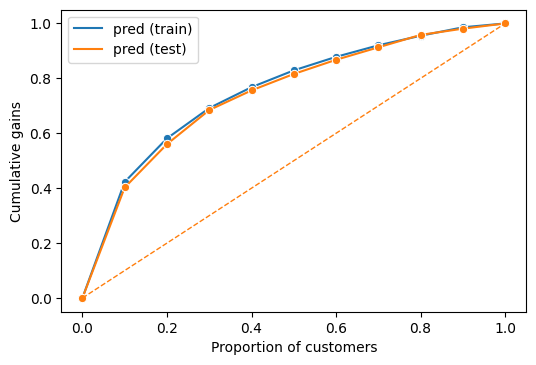

In [34]:
pred_train = pd.DataFrame().assign(
    actual = y_train, pred = clf_cv.predict_proba(x_train)[:, 1]
)
pred_test = pd.DataFrame().assign(actual = y_test, pred=clf_cv.predict_proba(x_test)[:, 1])

dct = {"train": pred_train, "test": pred_test}
fig = rsm.gains_plot(dct, "actual", 1, "pred").legend(title=None)

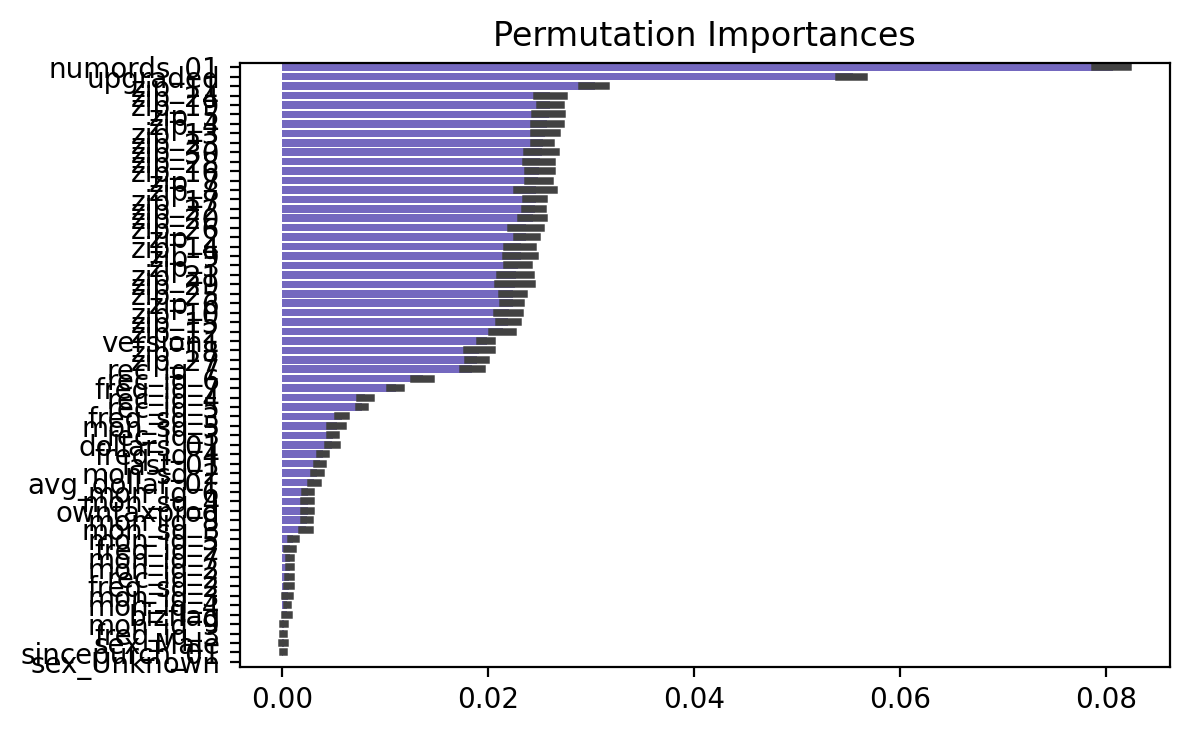

In [35]:
mpl.rcParams["figure.dpi"] = 200
fig = importance(clf_cv, x_train, y_train, train.columns)

In [36]:
pred_proba = clf_cv.predict_proba(x_test)[:,1]

pred_result = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "pred_proba":pred_proba})

pred_result["pred_yes"] = pred_result["pred_proba"].apply(lambda x: 1 if x > breakeven else 0)

pred_result

,id,res1_yes,pred_proba,pred_yes
1,2,0,0.031791,1
2,3,0,0.077207,1
4,5,0,0.030047,1
6,7,0,0.032807,1
8,9,0,0.015301,0
...,...,...,...,...
74981,74982,0,0.017948,0
74982,74983,0,0.018317,0
74987,74988,0,0.134268,1
74993,74994,1,0.175038,1


In [37]:
print("AUC is:", roc_auc_score(y_test, pred_result["pred_proba"]))
print("Recall Score is:", recall_score(y_test, pred_result["pred_yes"]))
print("Precision Score is", precision_score(y_test, pred_result["pred_yes"]))

#For the purposes of this exercise assume each mail piece costs $1.41 and that the margin (or net revenue) from each responder, excluding the mailing cost, is $60.
profit = margin * pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 1)].shape[0] - cost * pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 0)].shape[0]
print("Profit is:", profit)

AUC is: 0.7645304577695817
Recall Score is: 0.8531278331822303
Precision Score is 0.07411783238815375
Profit is: 39885.45


### After knowing best parameters, we can adjust these parameters using Keras, which we believe is more flexible than sklean. After that we can compare the result from Keras with Sklearn

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping

from keras import backend as K
# Change metric function to profit
def ProfitCal(y_true, y_pred, breakeven = 1.41 / 60):
    y_pred = K.cast(y_pred >= breakeven, K.floatx())
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)

    return 60 * tp - 1.41 * (fp + tp)

model = Sequential()
model.add(Dense(6, activation = 'sigmoid', input_shape = (x_train.shape[1],)))
#model.add(Dropout(0.2))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dropout(0.25))
#model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(16, activation = 'sigmoid'))
#model.add(Dropout(0.1))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1, activation = "sigmoid"))

# Metrics could choose: ['AUC'], metrics.Recall(), metrics.Precision()
model.compile(optimizer = optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics = [ProfitCal])
model.fit(x_train, y_train, batch_size = 2048, epochs=100, validation_split = 0.2, callbacks = [EarlyStopping(patience = 10)])

Epoch 1/100
21/21 [==============================] - 1s 18ms/step - loss: 0.5224 - ProfitCal: 1.4975 - val_loss: 0.2559 - val_ProfitCal: 1.4414
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2292 - ProfitCal: 1.4407 - val_loss: 0.1935 - val_ProfitCal: 1.4414
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1934 - ProfitCal: 1.4735 - val_loss: 0.1909 - val_ProfitCal: 1.4414
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1915 - ProfitCal: 1.4584 - val_loss: 0.1907 - val_ProfitCal: 1.4414
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1915 - ProfitCal: 1.4632 - val_loss: 0.1903 - val_ProfitCal: 1.4414
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1920 - ProfitCal: 1.4814 - val_loss: 0.1898 - val_ProfitCal: 1.4414
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1857 - ProfitCal: 1.3603 - val_loss: 0.1892 - val_ProfitCal: 1.441

In [39]:
pred_proba = model.predict_proba(x_test)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [40]:
pred_result = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "pred_proba":pred_proba.reshape((intuit75k[intuit75k["training"] == 0].shape[0],))})

pred_result["pred_yes"] = pred_result["pred_proba"].apply(lambda x: 1 if x > breakeven else 0)

pred_result

,id,res1_yes,pred_proba,pred_yes
1,2,0,0.040628,1
2,3,0,0.044786,1
4,5,0,0.030702,1
6,7,0,0.028510,1
8,9,0,0.016822,0
...,...,...,...,...
74981,74982,0,0.018279,0
74982,74983,0,0.015434,0
74987,74988,0,0.127946,1
74993,74994,1,0.164540,1


In [41]:
print("AUC is:", roc_auc_score(y_test, pred_result["pred_proba"]))
print("Recall Score is:", recall_score(y_test, pred_result["pred_yes"]))
print("Precision Score is", precision_score(y_test, pred_result["pred_yes"]))

#For the purposes of this exercise assume each mail piece costs $1.41 and that the margin (or net revenue) from each responder, excluding the mailing cost, is $60.
profit = margin * pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 1)].shape[0] - cost * pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 0)].shape[0]
print("Profit is:", profit)

AUC is: 0.7625693241835658
Recall Score is: 0.8304623753399819
Precision Score is 0.07700714585960487
Profit is: 39479.61


### It seems that Logistic Regression has a better performance. In wave 2, every response probability in wave-2 is only 50%

In [42]:
pred_proba = clf.predict_proba(x_test)[:,1]

pred_result = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "pred_proba":pred_proba})

pred_result["pred_proba"] = pred_result["pred_proba"] / 2
pred_result["pred_yes"] = pred_result["pred_proba"].apply(lambda x: 1 if x > breakeven else 0)
pred_result["mailto_wave2"] = np.where((pred_result.res1_yes == 0) & (pred_result.pred_yes == 1), "TRUE", "FALSE")


#final_result = pred_result[["id","mailto_wave2"]]
#final_result.to_csv("Kaicheng_Songqiao_Yanqiao_Tiancheng_Just4Noobs.csv",index=False)

pred_result

,id,res1_yes,pred_proba,pred_yes,mailto_wave2
1,2,0,0.016044,0,FALSE
2,3,0,0.047168,1,TRUE
4,5,0,0.015719,0,FALSE
6,7,0,0.021293,0,FALSE
8,9,0,0.008925,0,FALSE
...,...,...,...,...,...
74981,74982,0,0.009906,0,FALSE
74982,74983,0,0.009130,0,FALSE
74987,74988,0,0.046154,1,TRUE
74993,74994,1,0.096965,1,FALSE


### Scale to 801821 - 38487 = 763334 businesses

In [43]:
# Since we will deduct business that has responsed (38487), we decided to keep businesses that have responsed in wave 1 when calculating mail_to_rate
mail_to_rate = pred_result[pred_result["pred_yes"] == 1].shape[0] / pred_result.shape[0]
response_rate = pred_result[(pred_result["pred_yes"] == 1) & (pred_result["res1_yes"] == 1)].shape[0] / pred_result[pred_result["pred_yes"] == 1].shape[0]
mail_to_num = (801821 - 38487) * mail_to_rate
expect_profit = mail_to_num * response_rate * margin - mail_to_num * (1 - response_rate) * cost
expect_profit

1220319.6746693335

# MGTA 455 Project 1 Intuit Quickbooks 

Group 6 

Tiancheng Kuang, Songqiao Li, Yanqiao Li, Kaicheng Yang 

 

The purpose of this project is to build and apply a different modeling strategy to optimize the upsell campaign. Our source data is intuit75.pkl file contains data on 75,000 small businesses selected randomly from the 801,821 that were sent the waving – 1 mailing. In this dataset we have a training column, which includes the training sample (70) and test set (30). To make the most accurate prediction, our team utilized RFM, Logistic Regression, Neural Network and Combination methodology (RFM + Logistic Regression) to build multiple prediction models. To optimize the yield of the next campaign, we aim to increase the response rate for Wave 2 based on the experience of Wave 1. The following introduced the four methodology we applied: 

 

## Describe how you developed your predictive models, and discuss predictive performance for each model 

 

### RFM: 

RFM model is one of the model classic models to predict the profit in this scenario. We decided to use the “last” variable as the “recency”, “numords” as the frequency, and use the “dollars” as the “monetary.” The first step of the RFM model is to determine how many bins we want for each variable, in this case, we use 5,5,5 as the default number of bins for each variable. However, the performance does not go very well, especially for sequential RFM, the third bin in frequency is slightly better than the second bin which is not what we expected. Thus, we decided to use 5,4,5 for independent RFM and 5,3,5 for sequential RFM. As mentioned in the PDF, we decided to set the cost equals 1.41, and the margin equals 60. We created three functions to find which group of customers’ response rates are greater than the breakeven point and calculate the profit of the model. The first function is the response rate function which can return the response rate for each group, the second function is the wave2 function which can tell us which group of customers’ responses rates are greater than the breakeven point. The third function called per_calc function can return the profit based on our RFM model. After trying different parameters, the final output of our independent RFM model is 34174, and 33701 for our sequential RFM model. Two outputs are not good enough, we expect we can have a better performance when using logistic regression. 

 

### Logistic Regression:  

One of challenges for Logistic regression is that user do now know which variables can help us to build the “best” model. After learning the dataset, we pulled most of reasonable variables into our model and made a rough prediction (such as zip_bins , sex, numords , dollars, blizflag, last, sincepurch) . Here, we selected “zip_bins” variable instead of “zip”, because “zip” is widely spread variables. It can dramatically hurt the model's performance. The Logistic Regression model returns an AUC value as 0.698. AUC is one of the important measurements to evaluate the performance of machine learning/ modeling. However, we should also consider the accuracy of the model and the project purpose. In our scenario, we would like to raise the customer response rate in wave 2 and maximize the profit from there. Based on the regression summary, the confidence interval shows that “sex”, “bizflag” and “version1” are not statistically significant. We cut off those insignificant explanatory variables and build the model. The accuracy of the second logistic model increases from 0.3048 to 0.3049 and the profit increases $700. Following this logic, we adjusted and standardized input explanatory variables and train the model repeatedly. The performance of logistic regression is improving. But the overall accuracy and expected profits are still below our expectations. So, we decided to leverage the outputs of RFM and implemented it into the Logistic Regression.  

 

### Advanced combination (RFM + Logistic Regression and feature engineering): 

Although we obtained decent accuracy & profit from the RFM and Logistic regression modeling, we suspect that they might be able to benefit from each other. Thus, we used RFM classification on the whole dataset regardless of the train-test split and aim to get the most precise classification bins for recency, frequency, and monetary. In this phase, our optimal bin selection is also based on maximizing profit for which all the logistics follows what our original RFM modeling process provides. Using the same breakeven rate of 0.345, and then decide whom to email to according to rfm_iq, we are prepared for a comprehensive loop from recency to frequency and finally monetary. Also, zip code bins were also added for iterations. Then, we tried to apply techniques including standardizing, adding interaction terms, adding regularization, stepwise selection to the logistic regression. We tested out the best condition at this point to be standardized, and non-regularization, no interaction logistic regression with Sex,  numordd, dollars, last, sincepurch, version1, upgraded, zip_bins, rec_iq, freq_iq, mon_id, with 30 zip bins, 7 recency bins, 7 frequency bins, and 9 monetary bins that yields using the testing data of 38642 in profit, which is much higher than singular RFM and singular logistic modeling. 

 

Before putting training data into neural networks, we first implemented feature engineering. We have found that Zip_bins is an important variable, thus we tiled zip code, recency, frequency, and monetary according to our best combination of 30-7-7-9. Since features like Zip_bins, rec_iq and sex are categorical features, we implement One-hot coding on them. Besides, created a new feature called avg_dollar, which represents the average money spent on each order. We applied normalization to continuous and discrete variables as it speeds up learning and leads to faster convergence. After completing feature engineering, we are now ready to train our models. To evaluate the model beyond machine learning domain, we decided not only to evaluate models based on AUC, Recall, and precision but also profit can me make on the test set. The formula for calculating profit is 60 * TP – 1.41 * FP. We found logistic regression can make about 40K profits on the test set. 

 

### Neural Network: 

After that, we trained two versions of neural network based on sklearn and Keras. By using sklearn, we used GridSearchCV to find the best parameters. We found that (6,6) structure with logistic as activation function and Adam as the optimizer is the best hyperparameter in this case. Then, we build a new neural network model using Keras. One advantage of Keras is that it is more flexible compared to Sklearn. For example, we can change the activation function for different layers, change batch size and set new metrics to determine early stopping. We defined a function to calculate the profit on the validation set and set patience to 10. That is, if AUC and profit on the validation set did not get improved in 10 epochs, the neural network will stop the training process. Sklearn with grid search can make 39.5K profit and Keras can make the same profit but slightly lower than the Sklearn version of the neural network. 

 

## How did you compare and evaluate different models? 

Our team used AUC, and the profit. We can make on the test set as metrics to compare models. Since this is a very unbalanced dataset, comparing accuracy, precision and recall will be meaningless. Since our goal is to make more profit and we can make huge profits by making correct predictions and will only undertake small costs if we target the wrong customers. Therefore, although traditional machine learning metrics like AUC are still important, we care more about the profit we can make. Thus, we mainly use the final profit on test set as the criterion for model evaluation. 

 

## If you created new variables to include in the model, please describe these as well  

In the feature engineering process, we first did One-hot encoding to all categorical variables, 	then, we generated avgDollar as Dollar/numords as we suspect it potential positive effect to the model. We also normalized all numeric variables (exclude categorical) to range 0-1. 

 

## What criteria did you use to decide which customers should receive the wave-2 mailing? 

Since every response probability in wave-2 is only 50% of the response probability we predicted, we divided the predicted probability by 2. If the new probability of response exceeds the breakeven rate and that customer did not respond in wave 1, we will target this customer as the one should receive the wave-2 mailing. 

 

## How much profit do you anticipate from the wave-2 mailing? 

We calculated the estimated contact rate based on the percentage of customers in the test set we predicted to contact and calculated the estimated response rate based on the actual respondents divided by the number of customers we targeted in the test set. Among 801,821 businesses, 38,487 have already responded, thus the total number of potential customers is 763334. By multiplying 763334, contact rate, response rate and margin together, we will get the total revenue. By multiplying 763334 with contact rate, (1 – response rate) and cost together, we will get total cost. Finally, total profit will be total revenue minus total cost, which equals 1220319. That is the anticipated profit we can make from wave-2 mailing. 

 

## What did you learn about the type of businesses that are likely to upgrade? 

From the summary of logistics regression and permutation importance chart, we find the number of orders, if customer upgraded from Quickbooks version 1 to version 2 are the two most important features. Thus, if a business has many numbers of orders from Intuit directly and have upgraded version 1 to version 2, this business is more likely to upgrade. 